In [1722]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv("census_income.csv")

df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000
mean,40.016759,10.484054,1841.885825,116.625357,41.802926
std,13.033215,2.599928,9867.217768,465.333031,12.184754
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,30.000000,9.000000,0.000000,0.000000,40.000000
50%,39.000000,10.000000,0.000000,0.000000,40.000000
75%,49.000000,13.000000,0.000000,0.000000,48.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [1723]:
df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
1,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
2,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
3,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
4,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
5,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
6,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
7,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
8,56,Local-gov,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
9,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K


In [1724]:
df.workclass.unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Local-gov', '?',
       'Federal-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay'],
      dtype=object)

This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.

| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over 50K
| a year.
|

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.


sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

| First cited in:
| @inproceedings{kohavi-nbtree,
|    author={Ron Kohavi},
|    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
|           Decision-Tree Hybrid},
|    booktitle={Proceedings of the Second International Conference on
|               Knowledge Discovery and Data Mining},
|    year = 1996,
|    pages={to appear}}
|

In [1725]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [1726]:
(df=='?').sum()

age                 0
workclass         820
education           0
education-num       0
marital-status      0
occupation        823
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    318
income              0
dtype: int64

## since we have 18000 about datapoints out of which 820 data has no workclass so i will delete the rows in which there is no workclass mentioned.


## for the ocupation column part where there are 823 unknown datapoints we will,also delete that 823 rows because that plays an important role in finding the income of an individiual.


## and for the native country we can drop the whole column because country will not play an important role in deciding the income.


## and i am dropping the column which does not play an important role in deciding the income of an individual.





In [1727]:
df.drop(axis= "columns",labels = "marital-status",inplace= True)


In [1728]:
df.columns.unique()

Index(['age', 'workclass', 'education', 'education-num', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [1729]:
df.drop(axis= "columns",labels = "relationship",inplace= True)

In [1730]:
df.drop(axis= "columns",labels = "race",inplace= True)

In [1731]:
df.drop(axis= "columns",labels = "sex",inplace= True)

In [1732]:
df.drop(axis= "columns",labels = "native-country",inplace= True)

In [1733]:
df.columns.unique()

Index(['age', 'workclass', 'education', 'education-num', 'occupation',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

In [1734]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
occupation        0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64

In [1735]:
(df=="?").sum()

age                 0
workclass         820
education           0
education-num       0
occupation        823
capital-gain        0
capital-loss        0
hours-per-week      0
income              0
dtype: int64

In [1736]:
df.loc[df["workclass"]=="?", :]

,age,workclass,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
9,54,?,Some-college,10,?,0,0,60,>50K
37,52,?,HS-grad,9,?,0,0,45,>50K
82,59,?,Bachelors,13,?,0,0,40,>50K
96,28,?,Some-college,10,?,0,1887,40,>50K
128,65,?,Some-college,10,?,0,0,30,>50K
...,...,...,...,...,...,...,...,...,...
17793,63,?,11th,7,?,0,0,40,<=50K
17809,25,?,Bachelors,13,?,0,0,60,<=50K
17812,20,?,HS-grad,9,?,0,0,35,<=50K
17835,29,?,1st-4th,2,?,0,0,40,<=50K


In [1737]:
df.drop(axis="rows",labels = df.index[df["workclass"]=="?"], inplace=True)

In [1738]:
(df=="?").sum()

age               0
workclass         0
education         0
education-num     0
occupation        3
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64

In [1739]:
df.drop(axis="rows",labels = df.index[df["occupation"]=="?"], inplace=True)

In [1740]:
(df=="?").sum()

age               0
workclass         0
education         0
education-num     0
occupation        0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64

In [1741]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,17018.000000,17018.000000,17018.000000,17018.000000,17018.000000
mean,39.879481,10.529792,1873.608473,118.928958,42.231285
std,12.596835,2.584249,9965.267229,468.724987,11.859205
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,30.000000,9.000000,0.000000,0.000000,40.000000
50%,39.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,48.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [1742]:
df["income"].unique()

array(['>50K', '<=50K'], dtype=object)

# Two types f income are there so >50k is encoded as 1 and <=50k is encoded as 0

In [1743]:
df["income"].unique()

array(['>50K', '<=50K'], dtype=object)

In [1744]:
df.head()

,age,workclass,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
0,52,Self-emp-not-inc,HS-grad,9,Exec-managerial,0,0,45,>50K
1,31,Private,Masters,14,Prof-specialty,14084,0,50,>50K
2,42,Private,Bachelors,13,Exec-managerial,5178,0,40,>50K
3,37,Private,Some-college,10,Exec-managerial,0,0,80,>50K
4,30,State-gov,Bachelors,13,Prof-specialty,0,0,40,>50K


In [1745]:
df["occupation"].unique()

array(['Exec-managerial', 'Prof-specialty', 'Craft-repair',
       'Tech-support', 'Sales', 'Adm-clerical', 'Protective-serv',
       'Other-service', 'Machine-op-inspct', 'Farming-fishing',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [1746]:
df["education"].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th', 'Preschool'],
      dtype=object)

In [1747]:
df["workclass"].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [1748]:
df.index[df.duplicated()] ## deleting the duplicate rows 

Int64Index([   81,   151,   221,   294,   329,   359,   411,   434,   467,
              496,
            ...
            17821, 17823, 17824, 17825, 17827, 17829, 17832, 17834, 17837,
            17838],
           dtype='int64', length=3419)

In [1749]:
df.duplicated().sum()

3419

In [1750]:
df.drop(axis="rows", labels=df.index[df.duplicated()], inplace=True)



In [1751]:
df.duplicated().sum() ## after deleting the duplicated rows now we have 0 rows

0

In [1752]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000
mean,41.001324,10.594308,2316.144349,147.686521,42.788808
std,12.739940,2.704727,11030.095640,518.254138,12.765128
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,31.000000,9.000000,0.000000,0.000000,40.000000
50%,40.000000,10.000000,0.000000,0.000000,40.000000
75%,50.000000,13.000000,0.000000,0.000000,50.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [1753]:
df.head()

,age,workclass,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
0,52,Self-emp-not-inc,HS-grad,9,Exec-managerial,0,0,45,>50K
1,31,Private,Masters,14,Prof-specialty,14084,0,50,>50K
2,42,Private,Bachelors,13,Exec-managerial,5178,0,40,>50K
3,37,Private,Some-college,10,Exec-managerial,0,0,80,>50K
4,30,State-gov,Bachelors,13,Prof-specialty,0,0,40,>50K


In [1754]:
column_names_to_one_hot=["education"]
df=pd.get_dummies(df,columns=column_names_to_one_hot) ## one hot enoding the education column also

In [1755]:
df.head()

,age,workclass,education-num,occupation,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,52,Self-emp-not-inc,9,Exec-managerial,0,0,45,>50K,0,0,...,0,0,0,0,0,1,0,0,0,0
1,31,Private,14,Prof-specialty,14084,0,50,>50K,0,0,...,0,0,0,0,0,0,1,0,0,0
2,42,Private,13,Exec-managerial,5178,0,40,>50K,0,0,...,0,0,0,1,0,0,0,0,0,0
3,37,Private,10,Exec-managerial,0,0,80,>50K,0,0,...,0,0,0,0,0,0,0,0,0,1
4,30,State-gov,13,Prof-specialty,0,0,40,>50K,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1756]:
column_names_to_one_hot = ["occupation", "workclass"] ## one hot encoding of occupation and workclass

In [1757]:
df = pd.get_dummies(df, columns=column_names_to_one_hot)

In [1758]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,52,9,0,0,45,>50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,31,14,14084,0,50,>50K,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,42,13,5178,0,40,>50K,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,37,10,0,0,80,>50K,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,30,13,0,0,40,>50K,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1759]:
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0}) ## mapping of >50k to 1 and <=50k to 0

In [1760]:
###TRAINING AND TEST SPLITTING THE DATSETS 


#shuffle you dataset



shuffle_df=df.sample(frac=1)


#define size of your train set

train_size=int(0.8*len(df))


#split your dataset

train_set = shuffle_df[:train_size]
test_set=shuffle_df[train_size:]




In [1761]:
train_set

,age,education-num,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
3658,38,13,7688,0,55,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13410,39,13,0,0,45,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9876,23,9,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5356,68,11,25124,0,50,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9744,34,13,0,0,45,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16845,24,9,0,0,45,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11416,36,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12398,31,9,0,0,25,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5806,31,10,7298,0,50,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1762]:
test_set

,age,education-num,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
17349,22,9,0,0,35,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2947,41,10,0,0,50,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4442,37,10,5178,0,40,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4677,51,13,7688,0,20,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10548,42,6,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13843,54,10,0,0,42,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
534,47,3,0,0,55,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3562,50,13,0,0,50,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8487,21,9,0,0,30,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1763]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,52,9,0,0,45,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,31,14,14084,0,50,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,42,13,5178,0,40,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,37,10,0,0,80,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,30,13,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1764]:
df["income"].unique()



array([1, 0], dtype=int64)

# LOGISTIC REGRESSION





In [1765]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [1766]:
X_train=train_set.drop("income",axis=1)
Y_train=pd.DataFrame()   ## creating new data frame
Y_train["income"]=train_set["income"]

In [1767]:
X_test=test_set.drop("income",axis=1)
Y_test= pd.DataFrame()
Y_test["income"]=test_set["income"]

In [1768]:
X_train



,age,education-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
3658,38,13,7688,0,55,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13410,39,13,0,0,45,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9876,23,9,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5356,68,11,25124,0,50,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9744,34,13,0,0,45,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16845,24,9,0,0,45,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11416,36,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12398,31,9,0,0,25,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5806,31,10,7298,0,50,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1769]:
X_test



,age,education-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
17349,22,9,0,0,35,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2947,41,10,0,0,50,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4442,37,10,5178,0,40,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4677,51,13,7688,0,20,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10548,42,6,0,0,40,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13843,54,10,0,0,42,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
534,47,3,0,0,55,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3562,50,13,0,0,50,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8487,21,9,0,0,30,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


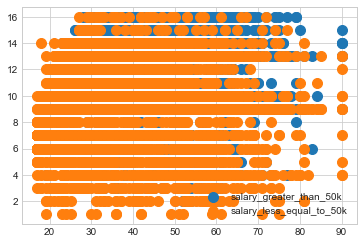

In [1856]:
salary_greater_than_50k =df.loc[Y==1] ## we are just taking out the salry which is greater than 50k


salary_less_equal_to_50k =df.loc[Y==0]## vice versa

## plotting 

    
plt.scatter(salary_greater_than_50k.iloc[:, 0], salary_greater_than_50k.iloc[:, 1], s=100, label='salary_greater_than_50k')
plt.scatter(salary_less_equal_to_50k.iloc[:, 0], salary_less_equal_to_50k.iloc[:, 1], s=100, label='salary_less_equal_to_50k')
plt.legend()
plt.show()

In [1850]:
Y_train



,income
3658,1
13410,0
9876,0
5356,1
9744,0
...,...
16845,0
11416,0
12398,0
5806,1


In [1771]:
#Y_test
X_train.shape

(10879, 42)

before fitting x and y shape (10879, 42) (10879, 1)
after fitting x and y shape (10879, 42) (10879, 1)


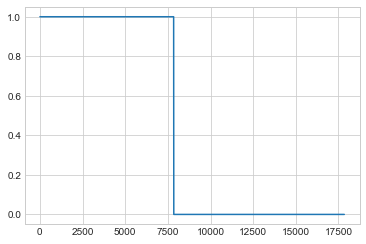

In [1847]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations    
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features  
        self.m, self.n = X.shape
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y 
        # gradient descent learning       
        for i in range( self.iterations ) :            
            self.update_weights()
        return self
    # Helper function to update weights in gradient descent
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
#         print("after fitting x and y shape",self.X.shape,self.Y.shape)        
# calculate gradients        
        tmp = ( A - self.Y.T )
        tmp = tmp.to_numpy()
        tmp = np.reshape( tmp, self.m )
        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
regressor = LogitRegression(learning_rate = 0.004, iterations = 1000)
print("before fitting x and y shape",X_train.shape,Y_train.shape)
model = regressor.fit(X_train,Y_train)
print("after fitting x and y shape",X_train.shape,Y_train.shape)
plt.plot(Y)












In [1773]:

#X_test = X_test.to_numpy()


In [1774]:
#X_train=X_train.to_numpy()

In [1775]:
#Y_train=Y_train.to_numpy()

In [1780]:
Y_pred = model.predict(X_test) 
#Y_test = Y_test.to_numpy()
print(type(Y_test))
print(type(Y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [1781]:
evaluate = 0
count = 0    
for count in range( np.size( Y_pred ) ) :  

    if Y_test[count] == Y_pred[count] :            
        evaluate = evaluate + 1     
    count = count + 1

print( "Accuracy on test set by our model :  ", (evaluate / count ) * 100 )

Accuracy on test set by our model :   61.06617647058824




def gradient_descent(X,Y):
    
    
    m_examples, n_features=np.shape(X)
    lrate=0.01
    Theta= np.ones(n_features)
    
    
    
    epoch=1000
    costs=[]
    for i in range(0, epoch):
        
        
        
        h_pred= _sigmoid(X,Theta)
        cost=np.sum(-Y * np.log(h_pred) - (1-Y) * np.log(1-h_pred))/m_examples
        costs.append(cost)
        j=(1/m_examples) * ((X.T).dot(h_pred-Y))
        Theta=Theta - lrate*j
        
        
        
    plt.plot(costs)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    
    return Theta, h_pred
        
        
        
        
        

def _sigmoid(X,Theta):
    p=1/(1+np.exp(-(Theta@X.T)))
    
    return p
    

W, h_pred=gradient_descent(X_train,Y_train)

# NAIVE BAYES :-


In [1782]:
def calc_statistics( features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        
        mean = features.groupby(target).apply(np.mean).to_numpy()
        var = features.groupby(target).apply(np.var).to_numpy()
              
        return mean, var

In [1783]:
train_set

,age,education-num,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
3658,38,13,7688,0,55,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13410,39,13,0,0,45,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9876,23,9,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5356,68,11,25124,0,50,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9744,34,13,0,0,45,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16845,24,9,0,0,45,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11416,36,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12398,31,9,0,0,25,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5806,31,10,7298,0,50,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1784]:
test_set

,age,education-num,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
17349,22,9,0,0,35,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2947,41,10,0,0,50,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4442,37,10,5178,0,40,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4677,51,13,7688,0,20,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10548,42,6,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13843,54,10,0,0,42,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
534,47,3,0,0,55,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3562,50,13,0,0,50,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8487,21,9,0,0,30,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1785]:
trial = train_set.groupby('income').apply(np.mean)
trial.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
income,,,,,,,,,,,,,,,,,,,,,
0,38.155803,9.643349,186.304187,73.240594,39.737856,0.0,0.039039,0.047695,0.018195,0.008126,...,0.115704,0.030207,0.064300,0.030030,0.081611,0.705529,0.026674,0.103162,0.052288,0.000707
1,44.166539,11.624186,4633.575316,219.774626,46.223841,1.0,0.007666,0.008816,0.004599,0.000767,...,0.131660,0.040820,0.046761,0.051552,0.086432,0.611154,0.092373,0.106363,0.052127,0.000000


In [1786]:
X_train.shape

(10879, 42)

In [1787]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [1788]:
Y_train.shape

(10879, 1)

In [1789]:
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>


In [1790]:
X_test.shape

(2720, 42)

In [1791]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [1792]:
Y_test.shape

(2720, 1)

In [1793]:
print(type(Y_test))

<class 'numpy.ndarray'>


In [1794]:
mean , var = calc_statistics(train_set,'income')

In [1809]:
print(mean)
mean.shape

[[3.81558029e+01 9.64334923e+00 1.86304187e+02 7.32405935e+01
  3.97378555e+01 0.00000000e+00 3.90390390e-02 4.76947536e-02
  1.81946653e-02 8.12577283e-03 1.57216040e-02 2.75569687e-02
  2.04910793e-02 4.22186893e-02 4.59282812e-02 1.35665077e-01
  5.47606430e-03 3.19024907e-01 3.88623918e-02 1.94311959e-03
  6.53594771e-03 2.27521639e-01 1.21003356e-01 1.76647235e-04
  1.24536301e-01 9.64493906e-02 4.55749868e-02 5.38774068e-02
  6.46528882e-02 1.40081258e-01 7.24253665e-03 1.11817700e-01
  2.43773185e-02 1.15703939e-01 3.02066773e-02 6.42995937e-02
  3.00300300e-02 8.16110228e-02 7.05529058e-01 2.66737326e-02
  1.03161986e-01 5.22875817e-02 7.06588942e-04]
 [4.41665389e+01 1.16241855e+01 4.63357532e+03 2.19774626e+02
  4.62238406e+01 1.00000000e+00 7.66577233e-03 8.81563818e-03
  4.59946340e-03 7.66577233e-04 1.91644308e-03 6.13261786e-03
  3.64124186e-03 3.87121502e-02 5.13606746e-02 2.64085857e-01
  4.12035263e-02 2.06400920e-01 1.23418934e-01 0.00000000e+00
  6.19011115e-02 1.793

(2, 43)

In [1796]:
var

array([[1.92168624e+02, 6.68873381e+00, 7.68721481e+05, 1.30301821e+05,
        1.75821052e+02, 0.00000000e+00, 3.75149925e-02, 4.54199641e-02,
        1.78636194e-02, 8.05974465e-03, 1.54744351e-02, 2.67975822e-02,
        2.00711950e-02, 4.04362716e-02, 4.38188742e-02, 1.17260064e-01,
        5.44607702e-03, 2.17248016e-01, 3.73521063e-02, 1.93934388e-03,
        6.49322910e-03, 1.75755543e-01, 1.06361544e-01, 1.76616031e-04,
        1.09027011e-01, 8.71469056e-02, 4.34979073e-02, 5.09746319e-02,
        6.04728922e-02, 1.20458499e-01, 7.19008232e-03, 9.93145020e-02,
        2.37830648e-02, 1.02316538e-01, 2.92942339e-02, 6.01651560e-02,
        2.91282273e-02, 7.49506637e-02, 2.07757806e-01, 2.59622445e-02,
        9.25195903e-02, 4.95535905e-02, 7.06089674e-04],
       [1.12014618e+02, 5.83212491e+00, 2.50045136e+08, 3.92840795e+05,
        1.29837592e+02, 0.00000000e+00, 7.60700826e-03, 8.73792270e-03,
        4.57830833e-03, 7.65989592e-04, 1.91277033e-03, 6.09500886e-03,
       

In [1797]:
import math
def calculateGaussianProbability(x, mean, stdev):
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo

In [1799]:
train_np_group = train_set.groupby('income')


In [1800]:
train_np_group.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
3658,38,13,7688,0,55,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13410,39,13,0,0,45,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9876,23,9,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5356,68,11,25124,0,50,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9744,34,13,0,0,45,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5320,39,13,7688,0,20,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11895,33,9,0,0,40,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2415,60,14,0,0,50,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9948,26,13,0,0,50,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2406,51,13,15024,0,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1801]:
train_set.shape


(10879, 43)

In [1816]:
print(type(train_set))

#trial=trial.to_numpy()

<class 'pandas.core.frame.DataFrame'>


In [1815]:
calculateGaussianProbability(train_set,mean,var)

ValueError: Unable to coerce to DataFrame, shape must be (10879, 43): given (2, 43)

In [1808]:
res = dict(tuple(train_set.groupby('income').apply()))

TypeError: apply() missing 1 required positional argument: 'func'

In [1828]:
X_train = train_set.drop('income',axis = 1)
Y_train = pd.DataFrame()
Y_train['income'] = train_set['income']
nb = NaiveBayes()
nb.fit(X_train, Y_train)

In [1819]:
test_set.dtypes

age                             int64
education-num                   int64
capital-gain                    int64
capital-loss                    int64
hours-per-week                  int64
income                          int64
education_10th                  uint8
education_11th                  uint8
education_12th                  uint8
education_1st-4th               uint8
education_5th-6th               uint8
education_7th-8th               uint8
education_9th                   uint8
education_Assoc-acdm            uint8
education_Assoc-voc             uint8
education_Bachelors             uint8
education_Doctorate             uint8
education_HS-grad               uint8
education_Masters               uint8
education_Preschool             uint8
education_Prof-school           uint8
education_Some-college          uint8
occupation_Adm-clerical         uint8
occupation_Armed-Forces         uint8
occupation_Craft-repair         uint8
occupation_Exec-managerial      uint8
occupation_F

In [1820]:
test_set = test_set.astype('float')

In [1821]:
test_set.dtypes

age                             float64
education-num                   float64
capital-gain                    float64
capital-loss                    float64
hours-per-week                  float64
income                          float64
education_10th                  float64
education_11th                  float64
education_12th                  float64
education_1st-4th               float64
education_5th-6th               float64
education_7th-8th               float64
education_9th                   float64
education_Assoc-acdm            float64
education_Assoc-voc             float64
education_Bachelors             float64
education_Doctorate             float64
education_HS-grad               float64
education_Masters               float64
education_Preschool             float64
education_Prof-school           float64
education_Some-college          float64
occupation_Adm-clerical         float64
occupation_Armed-Forces         float64
occupation_Craft-repair         float64


In [1839]:
# BRO NAIVE AGAIN





class GaussianNaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.means = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        # calculating the mean, variance and prior P(H) for each class
        for i, c in enumerate(self.classes):
            X_for_class_c = X[y==c]
            self.means[i, :] = X_for_class_c.mean(axis=0)
            self.var[i, :] = X_for_class_c.var(axis=0)
            self._priors[i] = X_for_class_c.shape[0] / float(n_samples)

    # calculating the likelihood, P(E|H)
    def _calculate_likelihood(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.var[class_idx]
        print(x)
        num = np.exp(-(x-mean)**2 / (2 * var))
        denom = np.sqrt(2 * np.pi * var)
        return num / denom

    def predict(self, X):
             y_pred = [self._classify_sample(x) for x in X]
             return np.array(y_pred)

    def _classify_sample(self, x):
        posteriors = []

        # calculating posterior probability for each class
        for i, c in enumerate(self.classes):
            prior = np.log(self._priors[i])
            posterior = np.sum(np.log(self._calculate_likelihood(i, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return the class with highest posterior probability
        return self.classes[np.argmax(posteriors)]

In [1840]:
gb = GaussianNaiveBayes()
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test.values)

[22  9  0  0 35  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
[22  9  0  0 35  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
[41 10  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0]
[41 10  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0]
[  37   10 5178    0   40    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1    0    0    1    0    0    0    0
    0    0    0    0    0    0    0    0    1    0    0    0    0    0]
[  37   10 5178    0   40    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1    0    0    1    0    0    0    0
    0    0    0    0    0    0    0    0    1    0    0    0    0    0]
[  51   13 7688    0   20    0    0    0    0    0    0 

In [1824]:
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
5330,50.0,14.0,0.0,1902.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1031,49.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7124,35.0,13.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14482,55.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2027,35.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1841]:



from sklearn.metrics import accuracy_score

accuracy_score(Y_test, predictions)

0.5095588235294117

In [1842]:


# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
# from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
# from sklearn import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [1843]:
gb = GaussianNB()
gb.fit(X_train,Y_train)
pred = gb.predict(X_test)

In [1844]:
accuracy_score(pred, Y_test, normalize = True)

0.6996323529411764